In [1]:
import numpy as np
import pandas as pd
from scipy.special import exp10
from matplotlib import pylab as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error

from SeqMM.pySeqUD import SeqUDSklearn

# Example 1: SVM for Classification

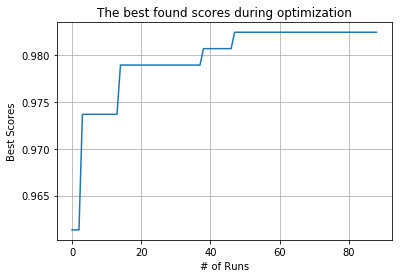

In [2]:
from sklearn import svm

sx = MinMaxScaler()
dt = datasets.load_breast_cancer()
x = sx.fit_transform(dt.data)
y = dt.target

ParaSpace = {'C':     {'Type': 'continuous', 'Range': [-6, 16], 'Wrapper': np.exp2}, 
             'gamma': {'Type': 'continuous', 'Range': [-16, 6], 'Wrapper': np.exp2}}

Level_Number = 20
estimator = svm.SVC()
score_metric = make_scorer(accuracy_score, True)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

clf = SeqUDSklearn(estimator, cv, ParaSpace, Level_Number, scoring = score_metric, n_jobs = 2, refit = True, verbose = True)
clf.fit(x, y)
clf.plot_scores()

A contour plot based on a thorough grid search

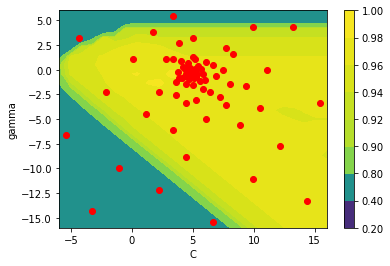

In [4]:
grid_num = 25
xlist = np.linspace(-6, 16, grid_num)
ylist = np.linspace(-16, 6, grid_num)
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros((grid_num,grid_num))
for i, C in enumerate(xlist):
    for j, gamma in enumerate(ylist):
        estimator = svm.SVC(C=2**C,gamma = 2**gamma)
        out = cross_val_score(estimator, x, y, cv = cv, scoring = score_metric)
        Z[j,i] = np.mean(out)
        
levels = [0.2, 0.4, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
cp = plt.contourf(X, Y, Z, levels)
plt.colorbar(cp)
plt.xlabel('C')
plt.ylabel('gamma')
plt.scatter(np.log2(clf.logs.loc[:,['C']]), 
            np.log2(clf.logs.loc[:,['gamma']]), color = "red")
plt.show()

# Example 2: Xgboost for Regression

In [5]:
import xgboost as xgb

dt = datasets.load_diabetes()
sx = MinMaxScaler()
x = sx.fit_transform(dt.data)
y = dt.target

ParaSpace = {'booster':          {'Type': 'categorical', 'Mapping': ['gbtree', 'gblinear']},
             'max_depth':        {'Type': 'integer',     'Mapping': np.linspace(2,10,9)}, 
             'n_estimators':     {'Type': 'integer',     'Mapping': np.linspace(100,500,401)},
             'min_child_weight': {'Type': 'integer',     'Mapping': np.linspace(1,100,100)},
             'subsample':        {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'colsample_bytree': {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'learning_rate':    {'Type': 'continuous',  'Range': [-5, 1], 'Wrapper': np.exp2},
             'gamma':            {'Type': 'continuous',  'Range': [-5, 1], 'Wrapper': np.exp2},
             'reg_lambda':       {'Type': 'continuous',  'Range': [-5, 1], 'Wrapper': np.exp2},
             'reg_alpha':         {'Type': 'continuous',  'Range': [-5, 1], 'Wrapper': np.exp2}}

Level_Number = 20
estimator = xgb.XGBRegressor()
score_metric = make_scorer(mean_squared_error, False)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

clf = SeqUDSklearn(estimator, cv, ParaSpace, Level_Number, scoring = score_metric, n_jobs = 10, refit = True, verbose = True)
clf.fit(x, y)
clf.plot_scores()

Stage 1 completed (20/100) with best score: -3304.37148.
Stage 2 completed (38/100) with best score: -3146.39321.
Stage 3 completed (56/100) with best score: -3146.39321.
Stage 4 completed (74/100) with best score: -3111.60877.
Stage 5 completed (92/100) with best score: -3095.62898.
Maximum number of runs reached, stop!
Search completed in 62.76 seconds.
The best score is: -3095.62898.
The best configurations are:
booster             : gbtree
max_depth           : 8
n_estimators        : 249
min_child_weight    : 63
subsample           : 0.5
colsample_bytree    : 0.21562
learning_rate       : 0.16281
gamma               : 0.10466
reg_lambda          : 0.1506
reg_alpha           : 0.53821


,booster_UD_1,booster_UD_2,max_depth_UD,n_estimators_UD,min_child_weight_UD,subsample_UD,colsample_bytree_UD,learning_rate_UD,gamma_UD,reg_lambda_UD,...,n_estimators,min_child_weight,subsample,colsample_bytree,learning_rate,gamma,reg_lambda,reg_alpha,score,stage
0,0.325000,0.875000,0.875000,0.475000,0.725000,0.875000,0.725000,0.625000,0.325000,0.225000,...,290,73,0.875000,0.725000,0.420448,0.120742,0.079660,0.042689,-3754.551987,1
1,0.475000,0.275000,0.075000,0.625000,0.175000,0.775000,0.925000,0.975000,0.625000,0.175000,...,350,18,0.775000,0.925000,1.802501,0.420448,0.064704,0.225313,-32057.169695,1
2,0.425000,0.825000,0.025000,0.525000,0.775000,0.425000,0.025000,0.025000,0.725000,0.525000,...,310,78,0.425000,0.025000,0.034674,0.637280,0.277392,0.965936,-4699.783813,1
3,0.575000,0.375000,0.525000,0.075000,0.975000,0.725000,0.125000,0.425000,0.025000,0.075000,...,130,98,0.725000,0.125000,0.183011,0.034674,0.042689,0.277392,-3304.371480,1
4,0.975000,0.225000,0.775000,0.375000,0.825000,0.575000,0.575000,0.575000,0.575000,0.975000,...,250,83,0.575000,0.575000,0.341510,0.341510,1.802501,1.802501,-3331.619546,1
5,0.075000,0.575000,0.325000,0.425000,0.075000,0.175000,0.525000,0.275000,0.425000,0.025000,...,270,8,0.175000,0.525000,0.098073,0.183011,0.034674,1.464086,-3618.603924,1
6,0.275000,0.975000,0.225000,0.775000,0.225000,0.625000,0.325000,0.475000,0.125000,0.925000,...,410,23,0.625000,0.325000,0.225313,0.052556,1.464086,0.341510,-5611.823479,1
7,0.925000,0.725000,0.725000,0.925000,0.375000,0.525000,0.225000,0.325000,0.675000,0.125000,...,470,38,0.525000,0.225000,0.120742,0.517632,0.052556,0.064704,-3483.298074,1
8,0.025000,0.425000,0.375000,0.875000,0.875000,0.675000,0.475000,0.775000,0.975000,0.575000,...,450,88,0.675000,0.475000,0.784584,1.802501,0.341510,0.079660,-4867.632316,1
9,0.525000,0.475000,0.925000,0.975000,0.425000,0.275000,0.775000,0.825000,0.075000,0.625000,...,490,43,0.275000,0.775000,0.965936,0.042689,0.420448,1.189207,-4834.262850,1


 # Example 3: Kmeans for Unsupervised Clustering  

In [6]:
from sklearn.cluster import KMeans

sx = MinMaxScaler()
dt = datasets.load_iris()
x = sx.fit_transform(dt.data)
y = dt.target.reshape([-1,1])

ParaSpace = {'n_clusters':  {'Type': 'integer',    'Mapping': np.linspace(2,9,8)}, 
             'tol':         {'Type': 'continuous', 'Range': [-6, -3], 'Wrapper': exp10}}

Level_Number = 20
estimator = KMeans()
cv = KFold(n_splits=5, random_state=0, shuffle=True)

clf = SeqUDSklearn(estimator, cv, ParaSpace, Level_Number, n_jobs = 10, refit = True, verbose = True)
clf.fit(x)
clf.plot_scores()

Stage 1 completed (20/100) with best score: -0.70776.
Stage 2 completed (34/100) with best score: -0.70470.
Stage 3 completed (47/100) with best score: -0.68336.
Stage 4 completed (61/100) with best score: -0.68336.
Stage 5 completed (75/100) with best score: -0.68336.
Stage 6 completed (91/100) with best score: -0.68336.
Maximum number of runs reached, stop!
Search completed in 7.30 seconds.
The best score is: -0.68336.
The best configurations are:
n_clusters          : 9
tol                 : 0.00027


,n_clusters_UD,tol_UD,n_clusters,tol,score,stage
0,0.775000,0.725000,8,0.000150,-0.792669,1
1,0.875000,0.925000,9,0.000596,-0.707763,1
2,0.575000,0.025000,6,0.000001,-0.907448,1
3,0.925000,0.125000,9,0.000002,-0.714802,1
4,0.025000,0.425000,2,0.000019,-2.489966,1
5,0.475000,0.325000,5,0.000009,-1.007365,1
6,0.425000,0.975000,5,0.000841,-1.003857,1
7,0.175000,0.625000,3,0.000075,-1.487645,1
8,0.075000,0.875000,2,0.000422,-2.489966,1
9,0.675000,0.475000,7,0.000027,-0.808597,1
